# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observable Trends from analysis results:
1.	Based on the data collected for the cities used in this analysis, it is showing that there is a correlation between the latitude and max temperature for cities in northern and southern hemisphere. The data shows a negative linear regression in the cities located in northern hemisphere and positive linear regression in the cities located in southern hemisphere. Both linear regressions indicate the farther the location of the city from the equator (0 latitude), the temperature goes down thus indicating the cities that are farther from the equator has colder temperature.

2.	The data points between the humidity vs latitude for cities in northern and southern hemisphere are spread out thus indicating that the city’s distance from the equator doesn’t influence the humidity. Similar trends are also showing in the analysis result for cloudiness vs latitude and wind speed vs latitude.

3.	The number of cities used in this analysis are not equally distributed between the cities in northern vs southern hemisphere. The are more cities located in northern hemisphere compared to the cities located in southern hemisphere. With uneven cities distributions used in this analysis,  the result is showing that this distribution doesn’t influence the obvious trend that the farther the city from the equator the colder the temperature is. It is also showing that the location and distance of the city from the equator doesn’t impact the humidity, cloudiness and wind speed.

By: Rosie Gianan

In [1]:
#pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import json
import csv
import os
from datetime import datetime, timedelta

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
## Create a list of cities for a set of random latitude and longtitude

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up lists to hold reponse info
data_city_name       = []
data_city_latitude   = []
data_city_longitude  = []
data_max_temperature = []
data_humidity        = []
data_cloud_coverage  = []
data_wind_speed      = []
data_city_country    = []
data_city_datetime   = []

# Create the city counter and record set counter
city_ctr           = 0
set_ctr            = 1
city_processed_ctr = 0
city_skipped_ctr   = 0

# Build the base URL to request for weather data
url      = "http://api.openweathermap.org/data/2.5/weather?"
units    = "imperial"
url_base = f"{url}appid={weather_api_key}&units={units}&q="

print ("Beginning Data Retrieval")     
print ("-----------------------------")
for city in cities:

    # Assemble the url
    url_city = url_base + city
   
    # Retrieve the API data and format it into JSON 
    response = requests.get(url_city)
    
    # Save the data of each city
    response_json = response.json()
    
    try:
        
        # Pause for 60 seconds every 50 records processed
        if city_ctr > 49: 
            city_ctr = 0
            set_ctr +=1
            time.sleep(60) 
            
        data_city_name.append      (response_json['name']              )    
        data_city_latitude.append  (response_json['coord'] ['lat']     )
        data_city_longitude.append (response_json['coord'] ['lon']     )
        data_max_temperature.append(response_json['main']  ['temp_max'])
        data_humidity.append       (response_json['main']  ['humidity'])  
        data_cloud_coverage.append (response_json['clouds']['all']     )  
        data_wind_speed.append     (response_json['wind']  ['speed']   )
        data_city_country.append   (response_json['sys']   ['country'] )   
        data_city_datetime.append  (response_json['dt']                )
        
        print (f"Processing Record {city_ctr} of Set {set_ctr} | {city}")
        
        # Accumulate the processed counters
        city_ctr += 1
        city_processed_ctr += 1
        
    except (KeyError, IndexError):
        
        # Skip city without API data
        print (f"City {city} not found. Skipping...")
        city_skipped_ctr   += 1
        
print ("----------------------------- Data Retrieval Complete -----------------------------")       
print ("===================================================================================")        
print (f"Total number of cities processed: {city_processed_ctr}")
print (f"Total number of cities skipped  : {city_skipped_ctr}")
print ("===================================================================================")  

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | pevek
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | hasaki
Processing Record 8 of Set 1 | ushuaia
City mrirt not found. Skipping...
Processing Record 9 of Set 1 | morden
Processing Record 10 of Set 1 | flin flon
Processing Record 11 of Set 1 | katobu
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | klaeng
Processing Record 14 of Set 1 | olga
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | buraydah
Processing Record 17 of Set 1 | goundam
Processing Record 18 of Set 1 | dongsheng
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | hofn
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | puerto baqueri

Processing Record 25 of Set 4 | suntar
Processing Record 26 of Set 4 | nara
Processing Record 27 of Set 4 | kaitangata
Processing Record 28 of Set 4 | hermiston
Processing Record 29 of Set 4 | iquitos
Processing Record 30 of Set 4 | new norfolk
City lolua not found. Skipping...
Processing Record 31 of Set 4 | the valley
Processing Record 32 of Set 4 | esmeraldas
Processing Record 33 of Set 4 | camana
Processing Record 34 of Set 4 | youkounkoun
Processing Record 35 of Set 4 | thenzawl
Processing Record 36 of Set 4 | horodyshche
Processing Record 37 of Set 4 | savinskiy
Processing Record 38 of Set 4 | aban
Processing Record 39 of Set 4 | ketchikan
City axixa do tocantins not found. Skipping...
Processing Record 40 of Set 4 | sunndalsora
Processing Record 41 of Set 4 | avarua
Processing Record 42 of Set 4 | notse
Processing Record 43 of Set 4 | lavrentiya
Processing Record 44 of Set 4 | yellowknife
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | sitka
Processing Rec

Processing Record 14 of Set 8 | lerwick
Processing Record 15 of Set 8 | zhuhai
Processing Record 16 of Set 8 | buta
Processing Record 17 of Set 8 | mehamn
Processing Record 18 of Set 8 | nuristan
Processing Record 19 of Set 8 | kalmunai
Processing Record 20 of Set 8 | vredefort
Processing Record 21 of Set 8 | suici
Processing Record 22 of Set 8 | dourados
Processing Record 23 of Set 8 | antofagasta
Processing Record 24 of Set 8 | astara
Processing Record 25 of Set 8 | kralendijk
Processing Record 26 of Set 8 | savannah bight
Processing Record 27 of Set 8 | mount gambier
Processing Record 28 of Set 8 | road town
Processing Record 29 of Set 8 | tabuleiro do norte
Processing Record 30 of Set 8 | zima
Processing Record 31 of Set 8 | clyde river
Processing Record 32 of Set 8 | ponta do sol
Processing Record 33 of Set 8 | tanout
Processing Record 34 of Set 8 | panjab
Processing Record 35 of Set 8 | teahupoo
Processing Record 36 of Set 8 | tarancon
Processing Record 37 of Set 8 | ola
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert the data to DataFrame
city_df = pd.DataFrame({ "City"            : data_city_name
                       , "City latitude"   : data_city_latitude
                       , "City longitude"  : data_city_longitude
                       , "Max temperature" : data_max_temperature
                       , "Humidity"        : data_humidity
                       , "Cloud coverage"  : data_cloud_coverage
                       , "Wind speed"      : data_wind_speed
                       , "City country"    : data_city_country
                       , "City datetime"   : data_city_datetime
                       })

city_df.index.name = "City_ID"

#Export the city data into a .csv. 
output_data_file = "../output_data/cities.csv"
output_path      = os.path.join(output_data_file )
city_df.to_csv(output_path,index="False")

city_df

,City,City latitude,City longitude,Max temperature,Humidity,Cloud coverage,Wind speed,City country,City datetime
City_ID,,,,,,,,,
0,Pevek,69.7008,170.3133,48.78,64,0,12.59,RU,1659310108
1,Saint Paul Harbor,57.7900,-152.4072,62.11,72,100,5.75,US,1659310108
2,Atuona,-9.8000,-139.0333,76.87,75,12,14.50,PF,1659310108
3,Hermanus,-34.4187,19.2345,48.78,72,2,6.64,ZA,1659310109
4,Qaanaaq,77.4840,-69.3632,46.33,60,66,1.41,GL,1659310109
...,...,...,...,...,...,...,...,...,...
541,Churapcha,62.0025,132.4325,79.61,46,84,11.05,RU,1659310894
542,Kalach-na-Donu,48.6910,43.5264,71.44,63,29,7.65,RU,1659310895
543,Port Hueneme,34.1478,-119.1951,96.46,56,0,10.36,US,1659310895


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Inspect the data and remove the cities where the humidity > 100%

# check if there area cities where humidity > 100%
count_cities_gt_100_humidities = len(city_df[(city_df["Humidity"] > 100) ])

if count_cities_gt_100_humidities  > 0:
    print (f"count_cities_gt_100_humidities: {count_cities_gt_100_humidities }")

# Remove the cities where the humidity > 100% 
clean_city_data = city_df.loc[ (city_df["Humidity"] <= 100 ) 
                                     , :]
len(clean_city_data)

546

In [7]:
#  Get the indices of cities that have humidity over 100%.

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [9]:
# Get the date of analysis using the timestamp of the first row since the request to retrieve the data are most 
# likely will occur on the same day
from datetime import date as dt

date_df = pd.to_datetime(clean_city_data["City datetime"], unit='s').dt.date
date_only = date_df[0:1]

for item in date_only:
    analysis_date = str(item)

analysis_date

'2022-07-31'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Define a function to create scatter plot for Latitude vs. a given y_axis
def create_scatter_plot(scatter_parms_dict):
    
    # Save the y_axis value
    y_axis  = scatter_parms_dict.get("y_axis")
    ylabel  = scatter_parms_dict.get("ylabel")
    unit    = scatter_parms_dict.get("unit")
    outfile = scatter_parms_dict.get("outfile")
    
    # Build a scatter plot for Latitude vs. a given y_axis
    x_axis = clean_city_data["City latitude"]
    
    plt.scatter ( x_axis
                , y_axis
                , marker="o"
                )

    # Incorporate the other graph properties
    xlabel = "Latitude"

    plt.title  (f"{xlabel} vs. {ylabel} ({analysis_date})")
    plt.ylabel (f"{ylabel} {unit}")
    plt.xlabel (f"{xlabel}")
    plt.grid   (True)

    # Save the figure
    plt.savefig(f"../output_data/{outfile}")

    # Show plot
    plt.show()

## Latitude vs. Temperature Plot

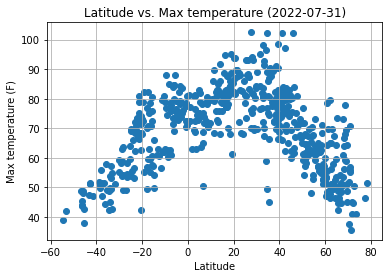

In [11]:
# Build a scatter plot for Latitude vs. Temperature

# Save the data to create the scatter plot in a dictionary
scatter_parms_dict =  { "y_axis"  : clean_city_data["Max temperature"]
                      , "ylabel"  : "Max temperature"
                      , "unit"    : "(F)"
                      , "outfile" : "fig01_Latitude_vs_Temperature.png"
}

# Call the function to create the scatter plot
create_scatter_plot(scatter_parms_dict )

#### Latitude vs. Temperature Plot
This plot analyzes the correlation between the latitude and max temperature for cities with humidity of less than or equal to 100. The plot is showing these trends with both trends has similar peak in max temperature:
-	Strong positive correlation between max temperature and latitude of less than 0.
-	Strong negative correlation between max temperature and latitude of greater than 0


## Latitude vs. Humidity Plot

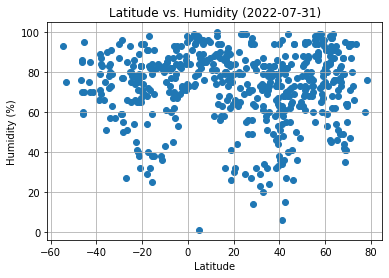

In [12]:
# Build a scatter plot for Latitude vs. Humidity 

# Save the data to create the scatter plot in a dictionary
scatter_parms_dict =  { "y_axis"  : clean_city_data["Humidity"]
                      , "ylabel"  : "Humidity"
                      , "unit"    : "(%)"
                      , "outfile" : "fig02_Latitude_vs_Humidity.png"
}

# Call the function to create the scatter plot
create_scatter_plot(scatter_parms_dict )

#### Latitude vs. Humidity Plot
This plot analyzes the correlation between the latitude and humidity for cities with humidity of less than or equal to 100. The plot shows no correlation between the latitude and humidity. The plot also shows the data points are gathered towards higher humidity.


## Latitude vs. Cloudiness Plot

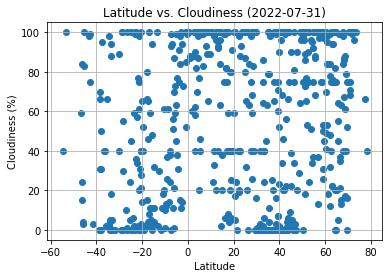

In [13]:
# Build a scatter plot for Latitude vs. Cloudiness 

# Save the data to create the scatter plot in a dictionary
scatter_parms_dict =  { "y_axis"  : clean_city_data["Cloud coverage"]
                      , "ylabel"  : "Cloudiness"
                      , "unit"    : "(%)"
                      , "outfile" : "fig03_Latitude_vs_Cloudiness.png"
}

# Call the function to create the scatter plot
create_scatter_plot(scatter_parms_dict )

#### Latitude vs. Cloudiness Plot
This plot analyzes the correlation between the latitude and cloudiness for cities with humidity of less than or equal to 100. The plot shows the data points are spread out thus indicating no correlation between the latitude and cloudiness. 

## Latitude vs. Wind Speed Plot

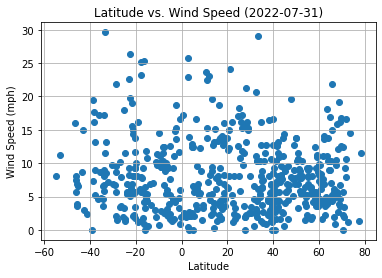

In [14]:
# Build a scatter plot for Latitude vs. Wind speed 

# Save the data to create the scatter plot in a dictionary
scatter_parms_dict =  { "y_axis"  : clean_city_data["Wind speed"]
                      , "ylabel"  : "Wind Speed"
                      , "unit"    : "(mph)"
                      , "outfile" : "fig04_Latitude_vs_WindSpeed.png"
}

# Call the function to create the scatter plot
create_scatter_plot(scatter_parms_dict )

#### Latitude vs. Wind Speed Plot
This plot analyzes the correlation between the latitude and wind speed for cities with humidity of less than or equal to 100. The plot shows no correlation between the latitude and wind speed.  The plot also shows the data points are gathered towards lower wind speed thus indicating there are  several cities with slower wind speed.

## Linear Regression

In [15]:
# Create a df of cities in Northern Hemisphere 
northern_hemisphere_df = clean_city_data.loc[ (clean_city_data["City latitude"] >= 0 ) 
                                            ]

# Create a df of cities in Southern Hemisphere 
southern_hemisphere_df = clean_city_data.loc[ (clean_city_data["City latitude"] < 0 ) 
                                            ]
print (f"Number of cities in northern_hemisphere: {len(northern_hemisphere_df)}")
print (f"Number of cities in southern_hemisphere: {len(southern_hemisphere_df)}")

Number of cities in northern_hemisphere: 378
Number of cities in southern_hemisphere: 168


In [16]:
# Define a function to create linear regression for a given hemisphere and y_axis vs Latitude 
def create_linear_regression(linear_regression_parms_dict):
    
    # Save the parms value from parms dict
    hemisphere_loc = linear_regression_parms_dict.get("hemisphere_loc")
    x_values       = linear_regression_parms_dict.get("x_values")
    y_values       = linear_regression_parms_dict.get("y_values")
    ylabel         = linear_regression_parms_dict.get("ylabel")
    unit           = linear_regression_parms_dict.get("unit")
    annotatate_x   = linear_regression_parms_dict.get("annotatate_x")  
    annotatate_y   = linear_regression_parms_dict.get("annotatate_y") 
    outfile        = linear_regression_parms_dict.get("outfile")
    
    # Perform a linear regression on y_values vs. x_values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Compare the calcualted Pearson's r to the plots
    plt.scatter( x_values
               , y_values
               , color="blue")

    # Add the line regresssion to plot
    plt.plot(x_values,regress_values,"r-")

    # Annotate the line equation
    plt.annotate(line_eq,(annotatate_x, annotatate_y),fontsize=10,color="red")

    # Set the title and x & y labels
    xlabel = "Latitude"
    plt.xlabel (f"{xlabel}")
    plt.ylabel (f"{ylabel} {unit}")
    plt.title  (f"{hemisphere_loc} Hemisphere - {ylabel} {unit} vs. {xlabel} ({analysis_date})")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Save the figure 
    plt.savefig(f"../output_data/{outfile}")

    # Show plot
    plt.show()

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4106186918589397


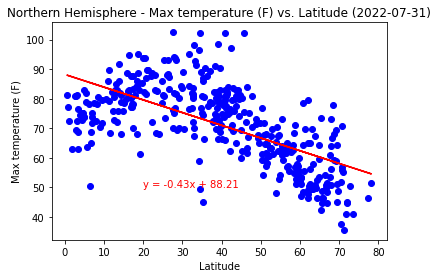

In [17]:
# Calculate the linear regression equation Northern Hemisphere - Temperature (F) vs. Latitude

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Northern"
                               , "x_values"       : northern_hemisphere_df["City latitude"]
                               , "y_values"       : northern_hemisphere_df["Max temperature"]
                               , "ylabel"         : "Max temperature"
                               , "unit"           : "(F)"
                               , "annotatate_x"   : 20
                               , "annotatate_y"   : 50
                               , "outfile"        : "fig05_Northern_Max_Temp_vs_Latitude.png"                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression
This plot analyzes the correlation between the latitude and max temperature for cities with latitude greater than or equal to zero. The plot shows a negative linear regression between the latitude and max temperature thus indicating the temperature gets colder as the latitude gets farther from 0 latitude. 


## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6250544720467077


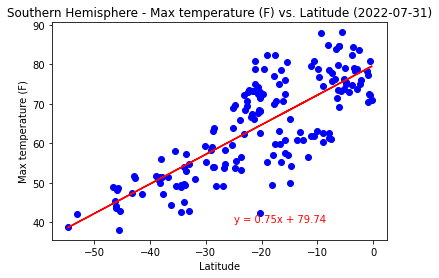

In [18]:
# Calculate the linear regression equation Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Southern"
                               , "x_values"       : southern_hemisphere_df["City latitude"]
                               , "y_values"       : southern_hemisphere_df["Max temperature"]
                               , "ylabel"         : "Max temperature"
                               , "unit"           : "(F)"
                               , "annotatate_x"   : -25
                               , "annotatate_y"   : 40
                               , "outfile"        : "fig06_Southern_Max_Temp_vs_Latitude.png"
                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression
This plot analyzes the correlation between the latitude and max temperature for cities with latitude less than zero. The plot shows a positive linear regression between the latitude and max temperature thus indicating the temperature gets colder as the latitude gets farther from 0 latitude. 


## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.004912319554302326


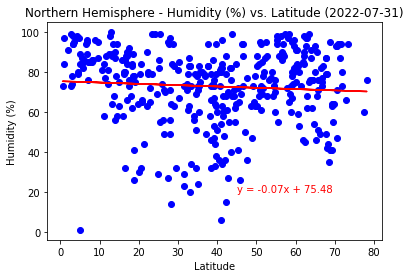

In [19]:
# Calculate the linear regression equation Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Northern"
                               , "x_values"       : northern_hemisphere_df["City latitude"]
                               , "y_values"       : northern_hemisphere_df["Humidity"]
                               , "ylabel"         : "Humidity"
                               , "unit"           : "(%)"
                               , "annotatate_x"   : 45
                               , "annotatate_y"   : 20
                               , "outfile"        : "fig07_Northern_Humidity_vs_Latitude.png"
                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
This plot analyzes the correlation between the latitude and humidity for cities with latitude greater than or equal to zero. The plot shows no correlation with a flat linear regression between the latitude and humidity. It also shows the data points are gathered in higher humidity. This indicates the distance of the city from the equator doesn’t impact its humidity.


## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00026671829668453376


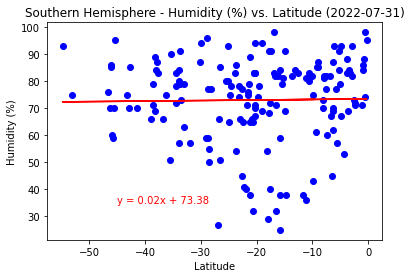

In [20]:
# Calculate the linear regression equation Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Southern"
                               , "x_values"       : southern_hemisphere_df["City latitude"]
                               , "y_values"       : southern_hemisphere_df["Humidity"]
                               , "ylabel"         : "Humidity"
                               , "unit"           : "(%)"
                               , "annotatate_x"   : -45
                               , "annotatate_y"   : 35
                               , "outfile"        : "fig08_Southern_Humidity_vs_Latitude.png"
                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
This plot analyzes the correlation between the latitude and humidity for cities with latitude less than zero. The plot shows data points are spread out  and no correlation with a flat linear regression between the latitude and humidity. This indicates the distance of the city from the equator doesn’t impact its humidity. 


## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.001965068602343414


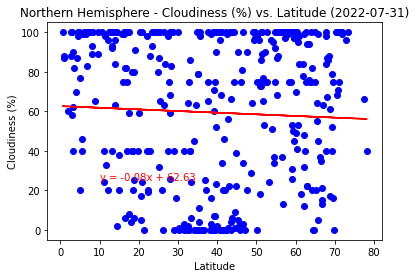

In [21]:
# Calculate the linear regression equation Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Northern"
                               , "x_values"       : northern_hemisphere_df["City latitude"]
                               , "y_values"       : northern_hemisphere_df["Cloud coverage"]
                               , "ylabel"         : "Cloudiness"
                               , "unit"           : "(%)"
                               , "annotatate_x"   : 10
                               , "annotatate_y"   : 25
                               , "outfile"        : "fig09_Northern_Cloudiness_vs_Latitude.png"
                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
This plot analyzes the correlation between the latitude and cloudiness for cities with latitude greater than or equal to zero. The plot shows no correlation with a flat linear regression between the latitude and cloudiness. This indicates the distance of the city from the equator doesn’t impact its cloudiness.


## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.011664855473794327


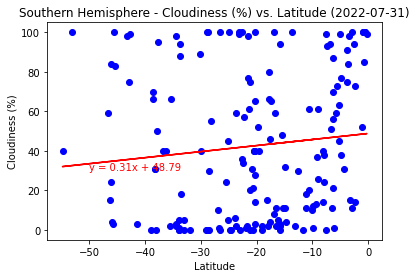

In [22]:
# Calculate the linear regression equation Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Southern"
                               , "x_values"       : southern_hemisphere_df["City latitude"]
                               , "y_values"       : southern_hemisphere_df["Cloud coverage"]
                               , "ylabel"         : "Cloudiness"
                               , "unit"           : "(%)"
                               , "annotatate_x"   : -50
                               , "annotatate_y"   : 30
                               , "outfile"        : "fig10_Southern_Cloudiness_vs_Latitude.png"
                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
This plot analyzes the correlation between the latitude and cloudiness for cities with latitude less than zero. The plot shows no correlation with a slightly positive incline linear regression between the latitude and cloudiness. This indicates the distance of the city from the equator doesn’t impact its cloudiness.


## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.002625034517651176


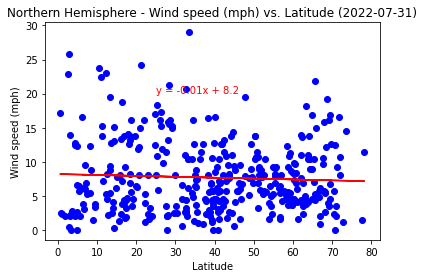

In [23]:
# Calculate the linear regression equation Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Northern"
                               , "x_values"       : northern_hemisphere_df["City latitude"]
                               , "y_values"       : northern_hemisphere_df["Wind speed"]
                               , "ylabel"         : "Wind speed"
                               , "unit"           : "(mph)"
                               , "annotatate_x"   : 25
                               , "annotatate_y"   : 20
                               , "outfile"        : "fig11_Northern_Wind_Speed_vs_Latitude.png"
                               
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
This plot analyzes the correlation between the latitude and wind speed for cities with latitude greater than or equal to zero. The plot shows the data points are spread out and no correlation with a flat linear regression between the latitude and wind speed. This indicates the distance of the city from the equator doesn’t impact its wind speed.


## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01060755270766429


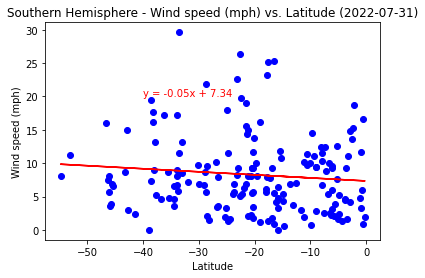

In [24]:
# Calculate the linear regression equation Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

# Save the data to create the scatter plot in a dictionary
linear_regression_parms_dict = { "hemisphere_loc" : "Southern"
                               , "x_values"       : southern_hemisphere_df["City latitude"]
                               , "y_values"       : southern_hemisphere_df["Wind speed"]
                               , "ylabel"         : "Wind speed"
                               , "unit"           : "(mph)"
                               , "annotatate_x"   : -40
                               , "annotatate_y"   : 20
                               , "outfile"        : "fig12_Southern_Wind_Speed_vs_Latitude.png"                              
}

# Call the function to create the linear regression
create_linear_regression(linear_regression_parms_dict )

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
This plot analyzes the correlation between the latitude and wind speed for cities with latitude less than zero. The plot shows the data points are spread out and no correlation with a slightly negative incline linear regression between the latitude and windspeed. This indicates the distance of the city from the equator doesn’t impact its wind speed.
